# Assignment 4

**Assignment Question: How does United State's Life Satisfaction compare with other nations and is Life Satisfaction of a country related to it's GDP per capita?**

The visualization is concerned with answering the above question, how does United State's Life Satisfaction compare with other nations and is Life Satisfaction of a country related to it's GDP per capita. The two datasets for this assignment were obtained from 'Organisation for Economic Co-operation and Development' website (http://www.oecd.org/). Data (Life Satisfaction and GDP per capita) from a collection of developing and developed nations were extracted, while others dropped, so as not to clutter the resulting plot to decrease graph functionality. Relative Life Satisfaction of the selected nations, including United States, was plotted against GDP per capita for the year 2017.

The graph indicates that there is indeed a strong correlation between the two metrics (Life Satisfaction and GDP per capita) as measured by Scipy's Pearson correlation coefficient of 0.636 but the relationship is not in anyway linear as shown by the Linear Regression plot in the graph. While United State's Life Satisfaction is among the developed nations' cluster (denoted by red filled circles) and higher than most developing nations (denoted by yellow filled circles) but some developing countries like Mexico and Chile are not too far off from advanced nations like United States and indeed higher than France and Luxembourg, two nations with the highest GDP per capita among the selected nations. Thus, this visualization signifies that Life satisfaction depends on a multitude of factors, not just GDP per capita, which may include Affordable Healthcare, Good K-12 and Higher Education, Cost-of-living, affordable and quality Housing, country's infrastructure like security and transport, etc.

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np # import numpy which is fundamental package for scientific computing with Python
import pandas as pd # import pandas which is high-performance, easy-to-use data structures and data analysis framework for the Python
import sklearn # import scikit Machine Learning framework for Python
from sklearn import linear_model # import Generalized Linear Models from scikit Machine Learning framework for Python
import os # import OS module which provides a way of using operating system dependent functionality

# to make this notebook's output stable across runs
np.random.seed(42)

%matplotlib inline
import matplotlib # importing plotting library for the Python programming language
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14 # setting axes labelsize
plt.rcParams['xtick.labelsize'] = 12 # setting x axes tick label size
plt.rcParams['ytick.labelsize'] = 12 # setting y axes tick label size

In [2]:
datapath = os.path.join("datasets", "lifesat", "") # joining the directories
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',') # reading the OECD dataset and storing it in a dataframe with thousand seperator removed from the values
oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"] # keeping only the nations with better index on gender equality
oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value") # pivoting the dataframe with country as index, indicator as columns 

In [3]:
oecd_bli 

Indicator,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Long-term unemployment rate,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Australia,13.0,2.1,10.5,1.1,76.0,14.02,72.0,0.8,31588.0,47657.0,...,1.08,50449.0,92.0,2.3,85.0,512.0,14.41,93.0,91.0,19.4
Austria,27.0,3.4,7.1,1.0,83.0,7.61,72.0,0.4,31173.0,49887.0,...,1.19,45199.0,89.0,1.6,69.0,500.0,14.46,75.0,94.0,17.0
Belgium,21.0,6.6,4.5,2.0,72.0,4.57,62.0,1.1,28307.0,83876.0,...,3.88,48082.0,94.0,2.2,74.0,509.0,15.71,89.0,87.0,18.9
Brazil,18.0,7.9,4.0,6.7,45.0,10.41,67.0,25.5,11664.0,6844.0,...,1.97,17177.0,90.0,1.6,69.0,402.0,14.97,79.0,72.0,16.3
Canada,15.0,1.3,10.5,0.2,89.0,3.94,72.0,1.5,29365.0,67913.0,...,0.90,46911.0,92.0,2.5,89.0,522.0,14.25,61.0,91.0,17.2
Chile,46.0,6.9,2.0,9.4,57.0,15.42,62.0,4.4,14533.0,17733.0,...,1.59,22101.0,86.0,1.2,59.0,436.0,14.41,49.0,73.0,16.5
Czech Republic,16.0,2.8,6.8,0.9,92.0,6.98,68.0,0.8,18404.0,17299.0,...,3.12,20338.0,85.0,1.4,60.0,500.0,14.98,59.0,85.0,18.1
Denmark,15.0,3.9,7.0,0.9,78.0,2.03,73.0,0.3,26491.0,44488.0,...,1.78,48347.0,95.0,1.9,72.0,498.0,16.06,88.0,94.0,19.4
Estonia,9.0,5.5,3.3,8.1,90.0,3.30,68.0,4.8,15167.0,7680.0,...,3.82,18944.0,89.0,1.5,54.0,526.0,14.90,64.0,79.0,17.5


In [4]:
gdp_per_capita = pd.read_csv(datapath+"gdp_per_capita.csv", thousands=',', delimiter='\t',
                             encoding='latin1', na_values="n/a") # reading the GDP per capita from a UN dataset
gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True) # renaming a column header
gdp_per_capita.set_index("Country", inplace=True) # setting country as index

In [5]:
gdp_per_capita

,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,
Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0
Argentina,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",13588.846,2013.0
Armenia,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3534.860,2014.0
Australia,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",50961.865,2014.0
Austria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",43724.031,2015.0


In [6]:
full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita, left_index=True, right_index=True) # merging the oecd and GDP per capita dataset
full_country_stats.sort_values(by="GDP per capita", inplace=True) # sort values by GDP per capita
full_country_stats

,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,,,,,,,,,,,,,,,,
Brazil,18.0,7.9,4.0,6.7,45.0,10.41,67.0,25.5,11664.0,6844.0,...,14.97,79.0,72.0,16.3,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",8669.998,2014.0
Mexico,30.0,12.8,9.0,4.2,37.0,28.83,61.0,23.4,13085.0,9056.0,...,13.89,63.0,67.0,14.4,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9009.280,2015.0
Russia,15.0,3.8,2.5,15.1,94.0,0.16,69.0,12.8,19292.0,3412.0,...,14.97,65.0,56.0,16.0,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9054.914,2015.0
Turkey,35.0,5.0,5.5,12.7,34.0,40.86,50.0,1.2,14095.0,3251.0,...,13.42,88.0,62.0,16.4,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9437.372,2013.0
Hungary,15.0,3.6,7.9,4.8,82.0,3.19,58.0,1.3,15442.0,13277.0,...,15.04,62.0,77.0,17.6,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",12239.894,2015.0
Poland,33.0,1.4,10.8,3.2,90.0,7.41,60.0,0.9,17852.0,10919.0,...,14.20,55.0,79.0,18.4,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",12495.334,2014.0
Chile,46.0,6.9,2.0,9.4,57.0,15.42,62.0,4.4,14533.0,17733.0,...,14.41,49.0,73.0,16.5,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",13340.905,2014.0
Slovak Republic,13.0,3.0,6.6,0.6,92.0,7.02,60.0,1.2,17503.0,8663.0,...,14.99,59.0,81.0,16.3,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",15991.736,2015.0
Czech Republic,16.0,2.8,6.8,0.9,92.0,6.98,68.0,0.8,18404.0,17299.0,...,14.98,59.0,85.0,18.1,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",17256.918,2015.0


In [7]:
full_country_stats["Life satisfaction"].corr(full_country_stats["GDP per capita"], method='pearson', min_periods=None) # computing pearson correlation between "GDP per capita" and "Life Satisfaction"

0.6356964586185304

In [8]:
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import numpy as np
import pandas as pd
import sklearn
from sklearn import linear_model


lin_reg_full = linear_model.LinearRegression() # importing linear regression models from scikit learn's linear model
Xfull = np.c_[full_country_stats["GDP per capita"]] # concatenate the entire values of column, "GDP per capita"
yfull = np.c_[full_country_stats["Life satisfaction"]] # concatenate the entire values of column, "Life satisfaction"
lin_reg_full.fit(Xfull, yfull) # fitting a linear regression model on "GDP per capita" as independent values and "Life satisfaction" as dependent values

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

/Users/musarratrahman/anaconda3/lib/python3.6/site-packages/matplotlib/patches.py:83: UserWarning: Setting the 'color' property will overridethe edgecolor or facecolor properties. 
  warnings.warn("Setting the 'color' property will override"


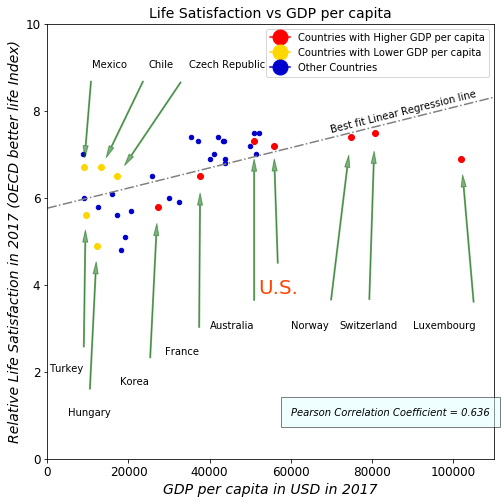

In [9]:
full_country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', color='mediumblue', figsize=(8,8)) # plotting scatterplot of 'Life satisfaction' vs "GDP per capita" 
plt.axis([0, 110000, 0, 10]) # defining axes ranges
position_text = {
    "Hungary": (5000, 1),
    "Korea": (18000, 1.7),
    "France": (29000, 2.4),
    "Australia": (40000, 3.0),
    "United States": (52000, 3.8),
    "Turkey": (500, 2.0),
    "Mexico": (11000, 9.0),
    "Chile": (25000, 9.0),
    "Czech Republic": (35000, 9.0),
    "Norway": (60000, 3),
    "Switzerland": (72000, 3.0),
    "Luxembourg": (90000, 3.0),
    } # defining dictionary containing position of Nations' names positions on the graph
for country, pos_text in position_text.items(): # iterating through aforementioned selected countries for study
    pos_data_x, pos_data_y = full_country_stats[["GDP per capita", 'Life satisfaction']].loc[country] # extracting GDP per capita & Life satisfaction of each country 
    plot_colour = 'gold' if (country == "Mexico") | (country == "Chile") | (country == "Czech Republic")  | (country == "Hungary") | (country == "Turkey") else 'red' # setting plot color of each country in interation
    colour = 'orangered' if country == "United States" else 'black' # setting text color of each country in iteration
    font_size = 20 if country == "United States" else 10 # font colour of each country in iteration
    country = "U.S." if country == "United States" else country
    plt.annotate(country, color=colour, fontsize=font_size, xy=(pos_data_x, pos_data_y), xytext=pos_text,
            arrowprops=dict(color='darkgreen', facecolor='black', width=1, shrink=0.1, alpha=0.5, headwidth=5)) # annotating the graph with points belonging to aforementioned selected countries for study
    plt.plot(pos_data_x, pos_data_y, color=plot_colour, marker='o', linewidth=10) # plotting the annotated graph
    
t0full, t1full = lin_reg_full.intercept_[0], lin_reg_full.coef_[0][0] # intercept & coefficient of linear regression model
X = np.linspace(0, 110000, 1000)
plt.plot(X, t0full + t1full * X, color='gray', ls='-.')
plt.text(70000, 7.5, "Best fit Linear Regression line", ha='left', rotation=14, wrap=True) # plotting the line plot obtained from the intercept & coefficient of linear regression model
    
text =  "Pearson Correlation Coefficient = 0.636"
   
plt.text(60000, 1, text, style='italic',
        bbox={'facecolor':'lightcyan', 'alpha':0.5, 'pad':10}) # highlighting the graph with pearson coefficient between the axes variables

plt.ylabel('Relative Life Satisfaction in 2017 (OECD better life Index)', fontsize=14, style='italic') # setting y label
plt.xlabel('GDP per capita in USD in 2017', fontsize=14, style='italic') # setting x label
plt.title('Life Satisfaction vs GDP per capita', fontsize=14) #setting plot title

legend_elements = [Line2D([0], [0], marker='o', color='red', label='Countries with Higher GDP per capita', markersize=15),
                   Line2D([0], [0], marker='o', color='gold', label='Countries with Lower GDP per capita', markersize=15),
                   Line2D([0], [0], marker='o', color='mediumblue', label='Other Countries', markersize=15)] # adding plot legends

plt.legend(handles=legend_elements, loc='best') # selecting plot legend location

plt.show()